In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from tqdm import tqdm

%matplotlib inline

In [9]:
X = load_digits()['data']
y = load_digits()['target']

In [22]:
def score(estimator):
    return np.mean(cross_val_score(estimator, X, y, cv=10))

def answer(data, name):
    with open(name, 'w') as f:
        f.write(str(data))

In [24]:
tree = DecisionTreeClassifier()
ans = score(tree)
print(ans)
answer(ans, '1.txt')

0.831374922408442


In [25]:
bag = BaggingClassifier(tree, 100)
ans = score(bag)
print(ans)
answer(ans, '2.txt')

0.9237337057728119


In [29]:
bag_ = BaggingClassifier(tree, 100, max_features=int(np.sqrt(X.shape[1])))
ans = score(bag_)
print(ans)
answer(ans, '3.txt')

0.9248882681564246


In [30]:
tree = DecisionTreeClassifier(max_features=int(np.sqrt(X.shape[1])))
bag_ = BaggingClassifier(tree, 100)
ans = score(bag_)
print(ans)
answer(ans, '4.txt')

0.9454531346989447


In [32]:
forest = RandomForestClassifier(n_estimators=100, max_features=int(np.sqrt(X.shape[1])))
score(bag_)

0.9504686530105524

In [46]:
forest = RandomForestClassifier(n_estimators=100, max_features=10)
score(bag_)

0.9443513345747983

In [36]:
n_trees = np.arange(5, 150, 5)

In [39]:
scores = []
for n in tqdm(n_trees):
    forest = RandomForestClassifier(n_estimators=n, max_features=int(np.sqrt(X.shape[1])))
    scores.append(score(forest))

100%|██████████| 29/29 [01:28<00:00,  3.06s/it]


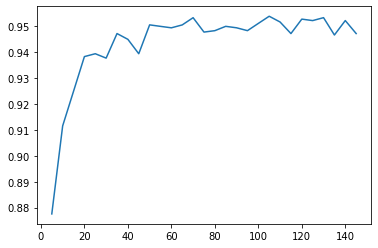

In [43]:
sns.lineplot(n_trees, scores)